### EDA

#### All EDA will be performed on the dataset with no stemming
Because we need to determine the average number of words in one tweet based on word length.  
Otherwise, they are the same

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nlp_helpers as nh

### Load data

In [2]:
data_no_stem_path = '../input/dialect-processed-data/preprocessed_data_no_stem.obj'

In [3]:
with open(data_no_stem_path, 'rb') as f:
    data = pickle.load(f)

In [4]:
data.head()

,id,text,dialect
0,1175358310087892992,"[بالنهايه, ينتفض, يغير]",IQ
1,1175416117793349632,"[يعني, محسوب, البشر, حيونه, ووحشيه, وتطلبون, ا...",IQ
2,1175450108898565888,"[مبين, كلامه, خليجي]",IQ
3,1175471073770573824,"[يسلملي, مرورك, وروحك, الحلوه]",IQ
4,1175496913145217024,"[وين, الغيبه, محمد]",IQ


In [5]:
print('Number of observations (tweets) in this dataset')
len(data)

Number of observations (tweets) in this dataset


458197

### Add `tweet_length` column

In [6]:
data['tweet_length'] = [len(tweet) for tweet in data['text']]

In [7]:
data.head()

,id,text,dialect,tweet_length
0,1175358310087892992,"[بالنهايه, ينتفض, يغير]",IQ,3
1,1175416117793349632,"[يعني, محسوب, البشر, حيونه, ووحشيه, وتطلبون, ا...",IQ,12
2,1175450108898565888,"[مبين, كلامه, خليجي]",IQ,3
3,1175471073770573824,"[يسلملي, مرورك, وروحك, الحلوه]",IQ,4
4,1175496913145217024,"[وين, الغيبه, محمد]",IQ,3


### Remove zero-length tweets

In [8]:
data = data[data['tweet_length'] > 0]

In [9]:
print('Number of observations (tweets) in this dataset, after removing zero-length tweets:')
len(data)

Number of observations (tweets) in this dataset, after removing zero-length tweets:


457929

### Average word length

In [10]:
words = nh.get_corpus_words(data['text'])

In [11]:
words[:10]

['بالنهايه',
 'ينتفض',
 'يغير',
 'يعني',
 'محسوب',
 'البشر',
 'حيونه',
 'ووحشيه',
 'وتطلبون',
 'الغرب']

In [12]:
word_len_avg = np.mean([len(word) for word in words])
print('The average length of the words:', word_len_avg)

The average length of the words: 4.764096911276797


### What is the maximum number of words a tweet can contain?
The maximum number of characters in a single tweet is 280,  
Therefore, based on our average word length, we can estimate the maximum number of words a regular user can type.

In [13]:
# average length is 4.76 characters, and there is no 0.76 character
print('Maximum number of words of average length:', 280/5) 

Maximum number of words of average length: 56.0


### Tweet length distriution

In [14]:
data['tweet_length'].describe()

count    457929.000000
mean         10.438302
std           7.691004
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max          61.000000
Name: tweet_length, dtype: float64

We notice that the max `tweet_length` is 61, which is very close to our calculations.  
Also, most tweets about 75% contain less than 14 words.

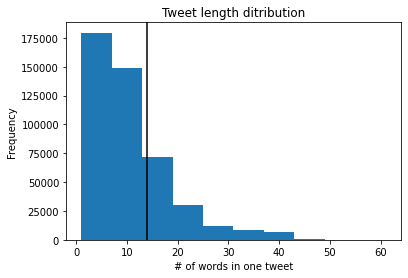

In [15]:
data['tweet_length'].plot(kind='hist')
plt.axvline(x=14, color='k')
plt.xlabel('# of words in one tweet')
plt.title('Tweet length ditribution')
plt.show()

### Dialect distribution

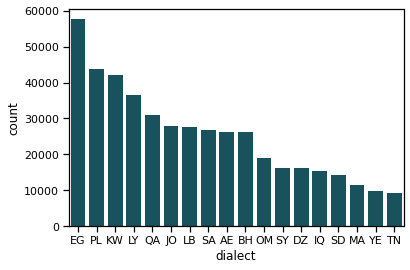

In [16]:
sns.set_context('notebook')
sns.countplot(x=data['dialect'], color='#0d5a68', order=data['dialect'].value_counts().index)
plt.show()

We notice that the class column `dialect` is unbalanced, with `EG` is the most frequent dialect.

### These quick findings will help in training our model